In [26]:
# 標準使用ライブラリー
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
import gc
import os
import shutil
from icecream import ic
from tqdm import tqdm_notebook as tqdm 

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 追記
import json
import datetime
import math
plt.style.use('dark_background')

# debug
#%pdb on

import pixiedust #%pixie_debugger

# tfがエラーはかないため
# tfがエラーはかないため
#import tensorflow as tf
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="5"
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [27]:
# ディレクレ
import numpy as np
from scipy import special

class Dirichlet():
    def __init__(self,para:list)->None:
        self.para = np.array(para)

    def pdf(self, x:list)->np.float:
        # 正規化定数 Z
        x_ar = np.array(x)
        cons = np.prod(special.gamma(self.para))/(special.gamma(np.sum(self.para)))
        p = (1./cons) * np.prod(x_ar**(self.para-1))
        return p

    def plt_3d(self, zlim=None)->None:
        xdata = np.linspace(0, 1, 200)
        ydata = np.linspace(0, 1, 200)
        X,Y = np.meshgrid(xdata, ydata)
        z = []
        X[X+Y>1] = 0
        Y[X+Y>1] = 0
        for _x, _y, _z in zip(X.flatten(), Y.flatten(), (1-X-Y).flatten()):
            z.append(self.pdf([_x, _y, _z]))

        Z = np.array(z).reshape(X.shape)
        ax3d = plt.axes(projection='3d')
        ax3d.plot_surface(X, Y, Z,cmap='plasma')
        ax3d.set_zlim(zlim)
        ax3d.set_xlabel("$x_1$")
        ax3d.set_ylabel("$x_2$")
        ax3d.set_zlabel("pdf$(x_1,x_2,1-x_1-x_2)$")
        ax3d.set_title("Dir($\\vec{\\alpha} = $" + "%s)" % self.para)
        plt.show()

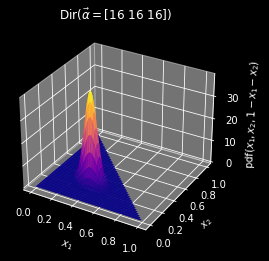

In [28]:
diri = Dirichlet([16,16,16]);diri.plt_3d()

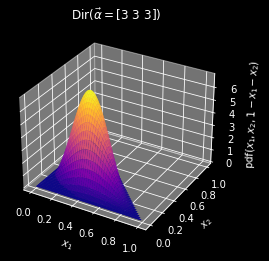

In [29]:
diri = Dirichlet([3,3,3]);diri.plt_3d()

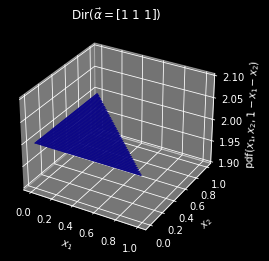

In [30]:
diri = Dirichlet([1,1,1]) ;diri.plt_3d()

In [31]:
# pip install ipympl
